<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_02/Bootcamp_Mod2_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg">

# **Tratamento, Exploração e Visualização de Dados**
---

Esse notebook servirá para o acompanhamento das aulas do Módulo 02 do ***Bootcamp de Data Science Aplicada*** realizado pela Alura.

Esse módulo será focado em aprofundar as análises realizadas no Módulo 01, trazendo dados de diferentes fontes e novas ferramentas gráficas para melhorar a visualização.

---

## **Aula 01 - Fontes Externas, Limpeza e Manipulação**
---


### Aula 01 - Vídeo 01
Atividade 3 - Usando fontes alternativas de dados

#### **Importação de Bibliotecas e Parametrizações Iniciais**
---
Vamos começar importando as diversas bibliotecas que usaremos ao longo desse notebook e realizando algumas configurações de parâmetros gerais que serão igualmente úteis.

In [1]:
#Biblioteca de Análise de Dados
import pandas as pd
import random
import numpy as np
from io import StringIO

#Bibliotecas de Criação de Visualizações Gráficas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
import seaborn as sns
#import plotly.graph_objects as go
#import plotly.express as px

#Bibliotecas de Apresentação de Informações no Google Colab
from google.colab import widgets, output
#import warnings

#Ignorar Avisos do Python
#warnings.filterwarnings('ignore')

#Formatando a exibição de números
pd.options.display.float_format = '{:,.2f}'.format

#Criando atalhos para usar cores nos textos de print
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   ITALIC = '\033[3m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Tendo as bibliotecas importadas, vamos à importação dos arquivos de dados. Como a intenção desse módulo é trabalhar com os dados mais recentes, acessei novamente o [TabNet](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi) e constatei que os dados atualmente no site já foram atualizados em relação aos importados no Módulo 1.


#### **Leitura Inicial dos Dados Atualizados**

Baixei então uma base atualizada (em 01/06/2021) e a coloquei no repositório do *GitHub*. Será com ela que trabalharemos nesse módulo, mesmo tendo que fazer novas verificações da consistência dos dados importados.

Como a importação, validação e preparação dos dados já foi feita no módulo anterior, vamos passar rapidamente pela sequência de código necessário para os seguintes passos:
* importar arquivo CSV de dados;
* validar os dados obtidos;
* eliminar colunas anteriores à 2008/Fev, que apresentam informações incompletas;
* acertar o índice do *DataFrame* para ser o nome de cada UF;
* incluir uma coluna com a informação de região geográfica de cada UF, para permitir agrupamentos;


In [2]:
# Estabelecendo a url de localização do arquivo CSV
url_atendimento_v2='https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/BaseDadosDataSUS-Estado-Atendimento_v2.csv'

In [3]:
# Importando o arquivo CSV, já desprezando a coluna 'Total'
# e colocando a coluna de UF como índice 
atends=pd.read_csv(url_atendimento_v2,
                   encoding='ISO-8859-1', engine='python',
                      skiprows=3, skipfooter=12,
                      sep=';',thousands='.', decimal=',',
                      index_col=0).drop('Total',axis=1)

In [4]:
# Desprezando as colunas iniciais, que apresentam dados incompletos
# Colunas anteriores a 2008/Fev foram desprezadas
atends.drop(atends.columns[:127],axis=1,inplace=True)

In [5]:
# Confirmando que os dados que sobraram na base estão como numéricos
atends.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 2008/Fev to 2021/Mar
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   11 Rondônia             158 non-null    float64
 1   12 Acre                 158 non-null    float64
 2   13 Amazonas             158 non-null    float64
 3   14 Roraima              158 non-null    float64
 4   15 Pará                 158 non-null    float64
 5   16 Amapá                158 non-null    float64
 6   17 Tocantins            158 non-null    float64
 7   21 Maranhão             158 non-null    float64
 8   22 Piauí                158 non-null    float64
 9   23 Ceará                158 non-null    float64
 10  24 Rio Grande do Norte  158 non-null    float64
 11  25 Paraíba              158 non-null    float64
 12  26 Pernambuco           158 non-null    float64
 13  27 Alagoas              158 non-null    float64
 14  28 Sergipe              158 non-nul

In [6]:
# Separando a coluna 'Unidade da Federação' em código e nome
atends.insert(0,'UF','xxx')
atends[['Código UF','UF']]=atends.index.str.split(' ',1).tolist()
atends=atends.reset_index().set_index('UF').drop('Unidade da Federação',axis=1)

# Usando o código para determinar a região geográfica
atends['Região']=atends['Código UF'].str[0]
dict_regioes = {'1' : 'Norte', '2' : 'Nordeste',
                '3' : 'Sudeste', '4' : 'Sul',
                '5' : 'Centro-Oeste'}

# Acrescentando a coluna 'Região' e eliminando a coluna de código
atends['Região']=atends['Região'].map(dict_regioes)
atends.drop('Código UF',axis=1,inplace=True)

Temos agora nossa base com as 27 UFs e os dados mensais entre 2008/Fev e 2021/Mar. Antes de prosseguir, vamos verificar os totais dos últimos 6 meses de dados que temos.

In [7]:
atends.drop('Região',axis=1).sum().tail(6)

2020/Out   1,455,575,204.34
2020/Nov   1,450,857,674.98
2020/Dez   1,451,868,546.56
2021/Jan   1,335,800,905.13
2021/Fev   1,052,795,454.22
2021/Mar     652,420,247.87
dtype: float64

Podemos ver que os dados de 2021 ainda se apresentam abaixo dos meses anteriores, um indicativo de que ainda podem estar faltando informações. Como o próprio *site* avisa, os dados referentes aos últimos 6 meses são passíveis de alterações.

Sendo assim, vamos desprezar também os dados de 2021, ficando somente com os dados até 2020/Dez.

In [8]:
# Elimina as colunas '2021/Jan', '2021/Fev' e '2021/Mar'
atends.drop(['2021/Jan','2021/Fev','2021/Mar'], axis=1, inplace=True)

In [9]:
# Verifica qual o último mês da base
mes_recente = atends.columns[-2]

# Para usar o mesmo mês visto nas aulas, vou forçar o valor da variável 'mes_recente'
mes_recente='2020/Jul'
mes_recente

'2020/Jul'

Plotando um gráfico de barras dos valores gastos do mês mais recente (2020/Dez, no caso), temos uma difícil comparação entre as UFs.

Na direita, usamos os valores proporcionais ao total do mês.

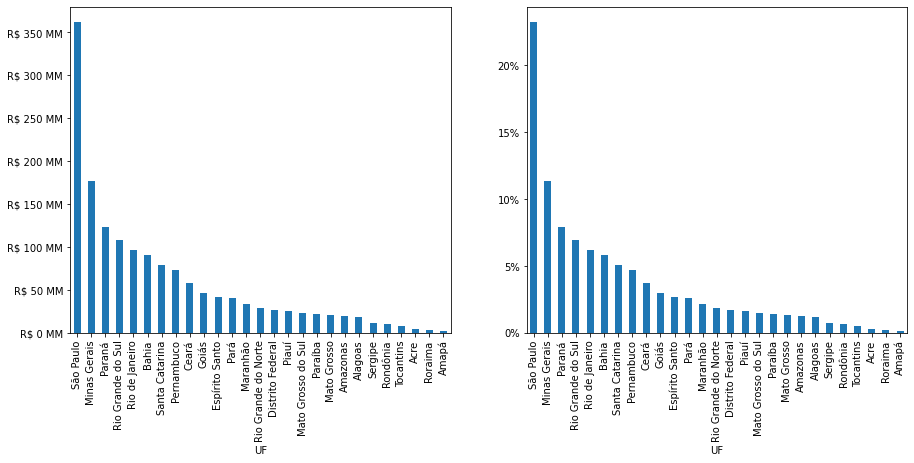

In [10]:
atends_mes_recente = atends[mes_recente].sort_values(ascending=False)
atends_proporcionais = atends_mes_recente/atends_mes_recente.sum()

fig, (ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1 = (atends_mes_recente/1000000).plot(kind='bar',ax=ax1)
ax1.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x:,.0f} MM'))

ax2 = atends_proporcionais.plot(kind='bar', ax=ax2)
ax2.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0%}'))

plt.show()

Apesar de termos o mesmo desenho gráfico, na direita podemos entender que SP ficou com algo em torno de 23% dos recursos do mês enquando MG, na 2ª posição, ficou com pouco mais de 10% do total.

Mesmo assim, a comparação pode ser melhorada se incluirmos os dados referentes à população, para avaliarmos os valores *per capita*.


#### Importando Dados Demográficos
---

O último censo brasileiro foi realizado em 2010, distante da data que estamos trabalhando. No Super Desafio do Módulo 1 usei os dados disponíveis no *TabNet* projetados pelo IBGE, também em formato CSV.

Mas a ideia aqui é buscar fontes alternativas de dados. Vamos recorrer à Wikipedia e importar os dados diretamente de lá, copiando e colando em uma variável *string*.

In [11]:
# Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o
# Data : 01/06/2021, 18:00

pop_projetada_str='''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)'''

Agora, tendo nossas informações armazenadas em um *string*, precisamos transformá-lo num fluxo de dados para poder ser lido usando o método **```read_csv```** que já vimos antes.



In [12]:
pop_projetada_IO = StringIO(pop_projetada_str)

pop_projetada = pd.read_csv(pop_projetada_IO,
                            sep='\t')

#### **Desafio - Ler essas informações diretamente da página da** ***Wikipedia***
---

In [13]:
### DESAFIO

# Importar Bibliotecas necessárias
import requests as r # Biblioteca para fazer requests
from bs4 import BeautifulSoup # Biblioteca para importar páginas HTML

# Definir a URL a ser importada
url_wiki='https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
response=r.get(url_wiki)

# Transformar a importação em objeto BeautifulSoup
soup=BeautifulSoup(response.text, 'html.parser')
tabela_pop=soup.find('table',{'class':"wikitable"})

# Converter o objeto BeautifulSoup em DataFrame
# Coloca a linha [0] como nomes das colunas
df_populacao=pd.DataFrame(pd.read_html(str(tabela_pop))[0])

display(df_populacao)

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


#### **Desafio - Alterar a Tabela Importada**
---
* renomear a coluna 'Unidade Federativa' para 'UF'
* desprezar as demais colunas
* desprezar a linha 0
* transformar 'UF' em índice
* limpar os espaços entre os números da coluna 'População'
---

Em função da continuidade das aulas deste módulo, vou fazer as alterações em um *DataFrame* temporário (**```pop_temp```**).

In [14]:
### DESAFIO

# Copiando o DataFrame
pop_temp = pop_projetada

# Renomeando a coluna 'UF'
pop_temp = pop_temp.rename(columns={'Unidade federativa':'UF'})

# Desprezar as demais colunas fora 'UF' e 'População'
pop_temp = pop_temp.drop(columns=pop_temp.columns[-2:], axis=1).drop('Posição',axis=1)

# Desprezar a linha 0
pop_temp.drop([0],inplace=True)

# Transformar 'UF' em índice
pop_temp = pop_temp.reset_index().set_index('UF').drop('index',axis=1)

# Limpar os espaços entre os números da coluna 'População'
pop_temp['População'] = pop_temp['População'].str.replace(' ','')
pop_temp = pop_temp.astype(float)

# Exibindo o resultado
display(pop_temp)

,População
UF,
São Paulo,"46,289,333.00"
Minas Gerais,"21,292,666.00"
Rio de Janeiro,"17,366,189.00"
Bahia Bahia,"14,930,634.00"
Paraná,"11,516,840.00"
Rio Grande do Sul,"11,422,973.00"
Pernambuco,"9,616,621.00"
Ceará,"9,187,103.00"
Pará Pará,"8,690,745.00"


### Aula 01 - Vídeo 02
Atividade 4 - Manipulação e junção de tabelas


Começamos fazendo os ajustes do segundo desafio do vídeo anterior para limpar a nossa tabela importada da *Wikipedia*.

In [15]:
pop_projetada.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


In [16]:
# Cria uma nova coluna com o nome 'UF'
pop_projetada['UF'] = pop_projetada['Unidade federativa']

# Elimina as linhas com dados nulos
pop_projetada = pop_projetada.dropna()

# Limpa os espaços e converte a coluna 'População' para o tipo Inteiro
pop_projetada['População'] = pop_projetada['População'].str.replace(' ','').astype(int)

# Pega somente as colunas que serão usadas e já estabelece a 'UF' como índice
pop_projetada=pop_projetada[['População','UF']].set_index('UF')

In [17]:
display(pop_projetada.head())
display(pop_projetada.info())

,População
UF,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   População  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

Agora vamos tentar combinar as tabelas de população projetada e os gastos do mês mais recente em um único *DataFrame*.

In [18]:
display(pop_projetada.join(atends_mes_recente))
print('\n')
print(color.BOLD+color.DARKCYAN+'Índices da Tabela '+color.UNDERLINE+'pop_projetada')
display(pop_projetada.index)

,População,2020/Jul
UF,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará Pará,8690745,nan




Índices da Tabela pop_projetada


Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='UF')

Podemos ver que o **```join```** não funcionou, pois não trouxe nenhum dado da tabela de gastos (a coluna foi preenchida com '***nan***', ou seja, *Not A Number*. Isso ocorreu por termos índices com valores distintos nas duas tabelas.

No vídeo não funcionou por dois motivos:
* os dados de gastos ainda estavam com o código da UF antes do nome (mas isso eu já havia resolvido na importação inicial)
* os dados de população obtidos da *Wikipedia* estão com espaços antes dos nomes das UFs, o que ainda precisa ser solucionado

Aqui só precisaremos limpar os espaços que temos no início e no fim de cada valor do índice e rodar o **```join```** novamente.


In [19]:
pop_projetada.index=pop_projetada.index.str.strip()

display(pop_projetada.join(atends_mes_recente))

,População,2020/Jul
UF,,
São Paulo,46289333,"361,986,896.25"
Minas Gerais,21292666,"177,466,638.10"
Rio de Janeiro,17366189,"95,941,141.03"
Bahia Bahia,14930634,nan
Paraná,11516840,"123,856,640.55"
Rio Grande do Sul,11422973,"108,536,525.93"
Pernambuco,9616621,"73,730,927.63"
Ceará,9187103,"58,448,488.85"
Pará Pará,8690745,nan


A junção das tabelas quase funcionou, tivemos erros apenas na Bahia e no Pará. Podemos ver que os nomes dessas UFs aparece repetido, provavelmente por estar no *HTML*, como texto alternativo para a imagem da bandeira.

A maneira utilizada para fazer essa correção foi a realização de um *loop* substituindo todos os nomes duplicados por sua versão simples, com o código abaixo.

In [20]:
for estado in atends_mes_recente.index:
    #print(f'{estado} {estado}',' ==> ',estado) ## Essa linha foi para ver se o for estava fazendo a instrução correta
    pop_projetada.index = pop_projetada.index.str.replace(f'{estado} {estado}',estado)

gastos_pop_recente = pop_projetada.join(atends_mes_recente)
display(gastos_pop_recente)

,População,2020/Jul
UF,,
São Paulo,46289333,"361,986,896.25"
Minas Gerais,21292666,"177,466,638.10"
Rio de Janeiro,17366189,"95,941,141.03"
Bahia,14930634,"91,011,171.04"
Paraná,11516840,"123,856,640.55"
Rio Grande do Sul,11422973,"108,536,525.93"
Pernambuco,9616621,"73,730,927.63"
Ceará,9187103,"58,448,488.85"
Pará,8690745,"40,496,349.97"


#### **Desafio - Estudar a Documentação a Respeito de Manipulação de** ***Strings***
---


Como sabemos, o ***Python*** considera um *string* como sendo uma *Series*, permitindo a manipulação de maneira bem interessante.

Além disso, temos várias operações e métodos que podem ser utilizados para alterar e formatar *strings*.

Procurando documentação a esse respeito, encontrei informações interessantes nos links:
* [Operações Comuns com *Strings*](https://docs.python.org/3/library/string.html)
* [Trabalhando com Dados Tipo Texto](https://pandas.pydata.org/docs/user_guide/text.html)
* [Métodos *String* em ***Python***](https://www.w3schools.com/python/python_ref_string.asp)

#### **Desafio - Estruturar uma Função para Limpeza da Tabela Importada**
---

Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas 'população' e 'unida'.

---

Para a resolução desse desafio, considerei que tinha apenas a *URL* da página de onde seriam retiradas as informações e o *DataFrame* com os dados de gastos do mês mais recente.

Optei por trabalhar com funções aninhadas, em vez de trabalhar com uma única função, principalmente para facilitar o entendimento e praticar a chamada de funções.

In [21]:
display(atends_mes_recente)
display(url_wiki)

UF
São Paulo             361,986,896.25
Minas Gerais          177,466,638.10
Paraná                123,856,640.55
Rio Grande do Sul     108,536,525.93
Rio de Janeiro         95,941,141.03
Bahia                  91,011,171.04
Santa Catarina         79,459,229.80
Pernambuco             73,730,927.63
Ceará                  58,448,488.85
Goiás                  45,871,329.20
Espírito Santo         41,931,102.65
Pará                   40,496,349.97
Maranhão               33,991,348.70
Rio Grande do Norte    28,608,103.39
Distrito Federal       26,428,483.82
Piauí                  25,817,440.95
Mato Grosso do Sul     23,639,938.85
Paraíba                22,092,553.67
Mato Grosso            20,681,571.71
Amazonas               19,303,743.16
Alagoas                18,519,350.73
Sergipe                11,700,344.16
Rondônia               10,479,989.36
Tocantins               7,934,629.02
Acre                    4,053,085.41
Roraima                 3,192,075.41
Amapá                   2,536,642.7

'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

In [22]:
def importa_wiki(url):
    response=r.get(url)

    soup=BeautifulSoup(response.text, 'html.parser')
    tabela_pop=soup.find('table',{'class':"wikitable"})

    df_populacao=pd.DataFrame(pd.read_html(str(tabela_pop))[0])

    return df_populacao

def limpa_pop(suja):
    suja = suja.rename(columns={'Unidade federativa':'UF'})
    suja = suja.dropna()
    #suja['UF'] = suja['Unidade federativa']
    suja['População'] = suja['População'].str.replace(' ','').astype(int)
    suja['UF'] = suja['UF'].str.strip()

    limpa = suja[['UF','População']].set_index('UF')
    #limpa.index=limpa.index.str.strip()

    return limpa

def faz_tudo(url_w, tab_gastos):
    pop_suja = importa_wiki(url_w)
    pop_limpa = limpa_pop(pop_suja)
    result = pop_limpa.join(tab_gastos)

    return pop_limpa,result

In [23]:
populacao, unida = faz_tudo(url_wiki,atends_mes_recente)
display(populacao)
display(unida)

,População
UF,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


,População,2020/Jul
UF,,
São Paulo,46289333,"361,986,896.25"
Minas Gerais,21292666,"177,466,638.10"
Rio de Janeiro,17366189,"95,941,141.03"
Bahia,14930634,"91,011,171.04"
Paraná,11516840,"123,856,640.55"
Rio Grande do Sul,11422973,"108,536,525.93"
Pernambuco,9616621,"73,730,927.63"
Ceará,9187103,"58,448,488.85"
Pará,8690745,"40,496,349.97"


### **O que aprendemos nessa aula?**
---

>* Como comparar os gastos em relação a determinado estado;
* Como fazer a leitura de dados no formato Excel com ***Pandas***;
* Como tornar uma *string* (com formato de tabela) legível em ***Pandas*** usando o **```String.IO```**;
* Como usar **```Join```** em ***Pandas***.

---
* Como criar uma função

## **Aula 02 - Proporcionalidades e** ***Seaborn***
---

### Aula 02 - Vídeo 01
Atividade 1 - Visualização, Seaborn e Proporcionalidades

É chegada a hora de visualizar os dados de gastos e população que juntamos em uma única tabela de dados.

Vamos começar com um gráfico simples, de linhas, com ambas as séries de dados.

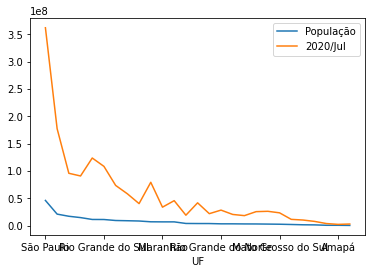

In [24]:
gastos_pop_recente.plot()

Fica um gráfico estranho, são grandezas de ordem diferente (gastos em R$ e população em quantidade de habitantes).

Uma solução utilizada algumas vezes é usar dois eixos **y**, mas isso deixa muita informação no gráfico, deixando a análise mais difícil.

Além disso, a comparação do gasto por habitante fica distorcida, pela diferença entre as unidades de medida. Vamos avaliar os dois primeiros *ticks* do gráfico, São Paulo e Rio Grande do Sul... visualmente, parece que São Paulo gasta muito mais do que o Rio Grande do Sul, mesmo tentando deduzir o custo por habitante.

A variação da curva azul é muito menor que a variação da curva laranja. Vamos avaliar os dados reais para ver se isso procede.

In [25]:
## Antes de perceber que poderia usar o valor da variável 'mes_recente'
## para pegar a coluna certa, pesquisei como transformar o slice do
## DataFrame em uma Series para poder fazer a conta...
## Preservei o código só para não perder essa parte do iloc com o squeeze

gastos_pop_recente['Gastos / Hab']=gastos_pop_recente.iloc[:,1:2].squeeze(axis=1)/gastos_pop_recente['População']

display(gastos_pop_recente.loc[['São Paulo','Rio Grande do Sul']])
gastos_pop_recente.drop('Gastos / Hab',axis=1,inplace=True)

,População,2020/Jul,Gastos / Hab
UF,,,
São Paulo,46289333,"361,986,896.25",7.82
Rio Grande do Sul,11422973,"108,536,525.93",9.50


In [26]:
gastos_pop_recente['Gastos / Hab']=gastos_pop_recente[mes_recente]/gastos_pop_recente['População']

display(gastos_pop_recente.loc[['São Paulo','Rio Grande do Sul']])
gastos_pop_recente.drop('Gastos / Hab',axis=1,inplace=True)

,População,2020/Jul,Gastos / Hab
UF,,,
São Paulo,46289333,"361,986,896.25",7.82
Rio Grande do Sul,11422973,"108,536,525.93",9.50


O que podemos ver, para o mês de 2020/Jul, é que o resultado é o oposto. O RS gastou, por habitante, mais que SP!

As hipóteses levantadas, antes de partirmos para a análise desse indicador para todas as UFs é de que:
* o valor pode ser muito semelhante, por existir um equilíbrio entre os estados em termos de gastos e população
* o valor tende a ser maior em estados melhores aparelhados, pois estamos vivenciando uma epidemia de COVID-19, o que leva muitas pessoas para UTIs, que tem um custo mais alto do que internações hospitalares comuns. As UFs com maior disponibilidade de leitos (comuns e de UTI) estão tendo maiores gastos.  As UFs com menos recursos estão tendo menos gastos mas a população fica desassistida

Acredito que esse tipo de análise fica difícil no momento de crise que vivemos sem saber qual a demanda reprimida... se a UF estiver limitando seus gastos por não ter mais estrutura para fornecer à população, a medida fica inverídica.

De qualquer forma, vamos calcular os gastos *per capita* e verificar como fica o gráfico.

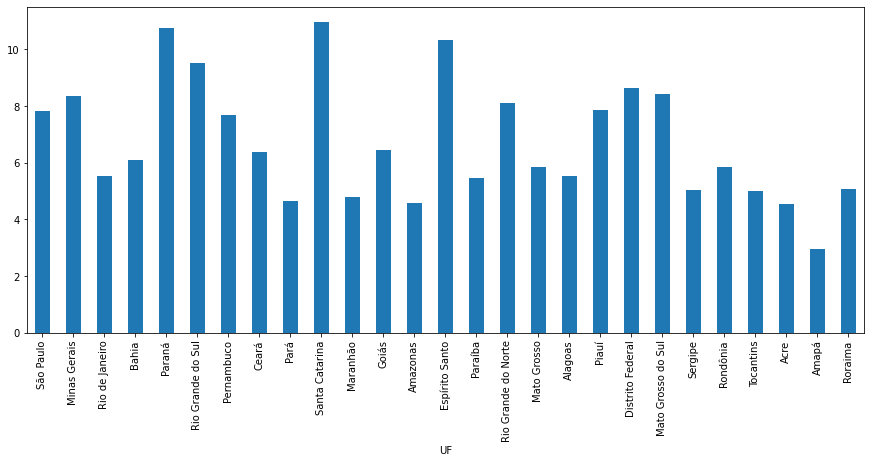

In [27]:
gastos_pop_recente['Gastos per Capita']=gastos_pop_recente[mes_recente]/(gastos_pop_recente['População'])

gastos_pop_recente['Gastos per Capita'].plot(kind='bar',figsize=(15,6))

As colunas foram mantidas na ordem original justamente porque essa ordenação já nos dá uma informação adicional. As UFs estão ordenadas pelo total de gastos, ou seja, São Paulo, mais à esquerda, foi a UF que mais gastou em valores absolutos, enquanto Roraima, à direita, foi a UF que menos gastou.

Podemos ver a falta de correlação entre os gastos absolutos e a população, pois se isso fosse verdade teríamos uma curva ascendente ou descendente nas barras. Temos grandes discrepâncias, com os valores variando entre R\$ 3 e R\$ 10 por habitante.

Temos valores diferentes do mostrado no vídeo da aula em função de atualização dos dados de gastos no DataSUS.


#### **Desafio - Ordenar o gráfico por gastos por habitante e por habitantes**
---

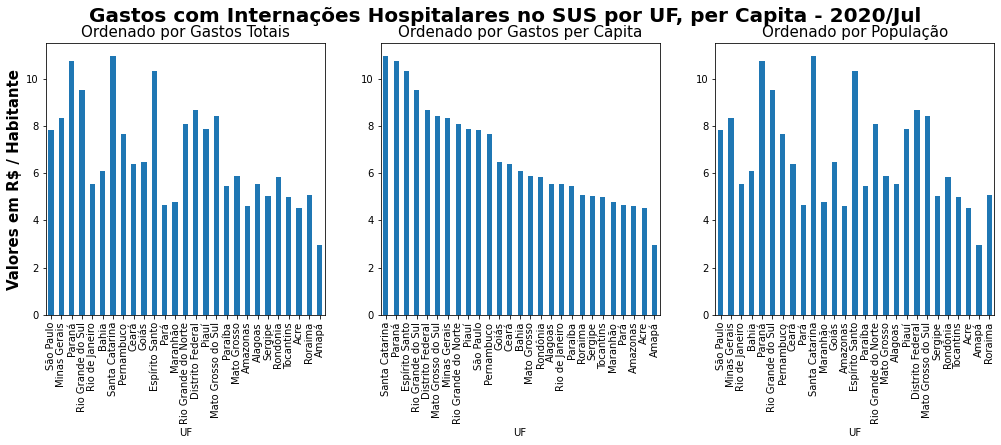

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(17,5))
fig.suptitle(f'Gastos com Internações Hospitalares no SUS por UF, per Capita - {mes_recente}',fontweight='bold', fontsize=20)

ax1 = gastos_pop_recente.sort_values(by=mes_recente,ascending=False)['Gastos per Capita'].plot(kind='bar', ax=ax1)
ax1.set_title('Ordenado por Gastos Totais', fontsize=15)
ax1.set_ylabel('Valores em R$ / Habitante',fontweight='bold', fontsize=15)

ax2 = gastos_pop_recente['Gastos per Capita'].sort_values(ascending=False).plot(kind='bar', ax=ax2)
ax2.set_title('Ordenado por Gastos per Capita', fontsize=15)

ax3 = gastos_pop_recente.sort_values(by='População',ascending=False)['Gastos per Capita'].plot(kind='bar', ax=ax3)
ax3.set_title('Ordenado por População', fontsize=15)

plt.show()

---

### De volta à aula

Vamos começar a usar a biblioteca **```Seaborn```** agora, para plotar o gráfico ```scatterplot``` que combina as informações de gastos e população.

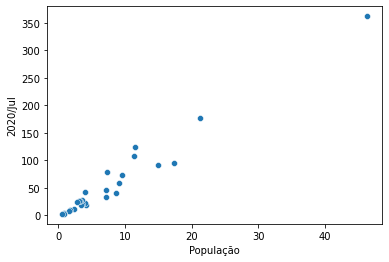

In [29]:
sns.scatterplot(data=gastos_pop_recente/1000000,x='População',y=mes_recente)

Para poder avaliar a relação mais direta entre os valores, já que estamos usando escalas diferentes nos eixos do gráfico, vamos forçar a figura para ficar com altura e largura iguais, dentro de um quadrado.

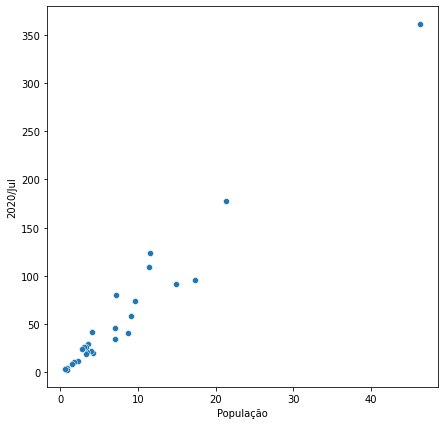

In [30]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_pop_recente/1000000,x='População',y=mes_recente)

Podemos perceber uma tendência de maiores gastos quanto maior a população da UF. Dá para imaginar uma reta cortando na diagonal do quadrado, passando pela maioria dos pontos.

Vamos avaliar esse mesmo gráfico, mas comparando os valores gastos por habitante com a população.

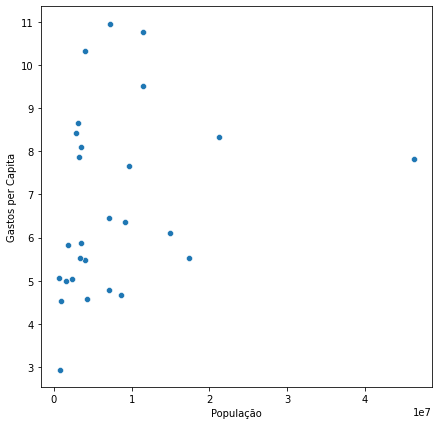

In [31]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_pop_recente,x='População',y='Gastos per Capita')

Aqui já não conseguimos enxergar uma reta que passe pela maioria dos pontos, indicando a falta de uma relação mais direta entre essas variáveis.

#### **Desafio - Fazer os mesmos gráficos para o mês anterior a este**
---

In [32]:
## Deixei pronto para usar o mês mais recente da base
## ou um mês escolhido manualmente, é só alterar qual
## a linha abaixo (6 ou 7) deve ser executada e deixar
## a outra comentada
#
mes_recente=atends.columns[-2]
mes_recente = '2020/Jul'

mes_anterior=atends.columns[atends.columns.get_loc(mes_recente)-1]

In [33]:
gastos_pop_recente = gastos_pop_recente.join(atends[mes_anterior])
gastos_pop_recente['GpC_2']=gastos_pop_recente[mes_anterior]/(gastos_pop_recente['População'])

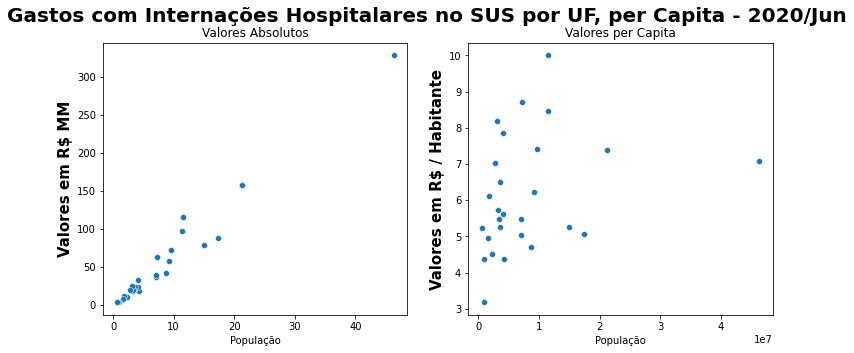

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
fig.suptitle(f'Gastos com Internações Hospitalares no SUS por UF, per Capita - {mes_anterior}',fontweight='bold', fontsize=20)

ax1 = sns.scatterplot(data=gastos_pop_recente/1000000,x='População',y=mes_anterior, ax=ax1)
ax1.set_title('Valores Absolutos', fontsize=12)
ax1.set_ylabel('Valores em R$ MM',fontweight='bold', fontsize=15)

ax2 = sns.scatterplot(data=gastos_pop_recente,x='População',y='GpC_2', ax=ax2)
ax2.set_title('Valores per Capita', fontsize=12)
ax2.set_ylabel('Valores em R$ / Habitante',fontweight='bold', fontsize=15)

plt.show()

#### **Desafio - Plotar os dois meses no mesmo gráfico, diferenciando por cores**
---

Procurei muito na documentação pois achava que tinha que estabelecer dois eixos **y** ou algo assim...

Na verdade, usando o ***Seaborn*** isso é muito mais simples, basta atribuir os dois gráficos à mesma variável que ele se encarega de colocar as informações juntas, separando por cor.

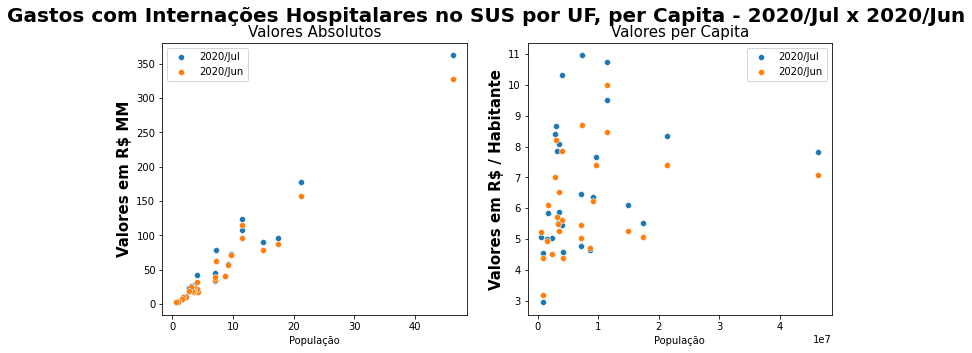

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
fig.suptitle(f'Gastos com Internações Hospitalares no SUS por UF, per Capita - {mes_recente} x {mes_anterior}',fontweight='bold', fontsize=20)

ax1 = sns.scatterplot(data=gastos_pop_recente/1000000,x='População',y=mes_recente, ax=ax1)
ax1 = sns.scatterplot(data=gastos_pop_recente/1000000,x='População',y=mes_anterior, ax=ax1)
ax1.set_title('Valores Absolutos', fontsize=15)
ax1.set_ylabel('Valores em R$ MM',fontweight='bold', fontsize=15)
ax1.legend([mes_recente,mes_anterior])

ax2 = sns.scatterplot(data=gastos_pop_recente,x='População',y='Gastos per Capita', ax=ax2)
ax2 = sns.scatterplot(data=gastos_pop_recente,x='População',y='GpC_2', ax=ax2)
ax2.set_title('Valores per Capita', fontsize=15)
ax2.set_ylabel('Valores em R$ / Habitante',fontweight='bold', fontsize=15)
ax2.legend([mes_recente,mes_anterior])

plt.show()

### Aula 02 - Vídeo 02
Atividade 3 - Resolvendo o Super Desafio da Aula


Esse vídeo resolve os desafios deixados pelo vídeo anterior e deixa um novo desafio, mais teórico.

Em relação aos desafios anteriores, a solução do Guilherme foi bem mais elegante e prática do que a minha. Ele criou uma função que vai agregando colunas no *DataFrame* ```gastos_pop_recente```, o que permite executar mais vezes e agregar mais meses. Para incluir um novo mês nos gráficos, como ele fez, preciso alterar mais código do que ele precisou.

Não tenho como fazer isso aqui sem alterar todo o código anterior e perder o histórico de como foram as aulas desse módulo até agora, por isso vou criar uma versão 2 dessa aula que vai conter esse código refatorado.

#### **Desafio Teórico - Analise os gráficos**
---

>Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese e que esses dados serão alterados.

### **O que aprendemos nessa aula?**
---

>* Como construir os primeiros gráficos com ***Seaborn***;
* Como fazer comparações dos resultados de forma proporcional a população;
* Como analisar gráficos como de gastos_por_habitantes X população e gastos X população, comparando suas diferenças e gerando hipóteses;
* O que são e como usar *Type hints*.

---
Essa parte do *Type Hints* foi muito rápida, preciso analisar melhor para poder entender como usar em chamadas de funções.